In [ ]:
print("Hello")

Hello


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/sentiment_project/archive.zip" -d "/content/drive/MyDrive/sentiment_project/dataset"

Archive:  /content/drive/MyDrive/sentiment_project/archive.zip
replace /content/drive/MyDrive/sentiment_project/dataset/training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset_path = "/content/drive/MyDrive/sentiment_project/dataset/training.1600000.processed.noemoticon.csv"

#dataset_path = "/content/drive/MyDrive/ML projects/sentiment_project/dataset/training.1600000.processed.noemoticon.csv" #for ahmad

In [ ]:
import pandas as pd

data = pd.read_csv(dataset_path, encoding='latin-1')  #encoding='latin-1' to solve UniEncodeError

In [ ]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.columns = ['Polarity','IDs','Date','Flag','User','Text of tweet']

In [ ]:
data.head()

,Polarity,IDs,Date,Flag,User,Text of tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
print(data)

         Polarity         IDs                          Date      Flag  \
0               0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1               0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2               0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3               0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4               0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...           ...         ...                           ...       ...   
1599994         4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995         4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996         4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997         4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998         4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    User                                      Text of tweet  
0          scotthamilton  is upset that he ca

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9953a4c490>,
      dtype=object)

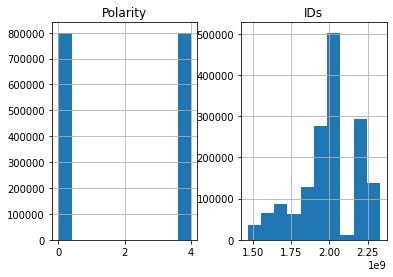

In [ ]:
data.hist()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus.reader.tagged import word_tokenize
from nltk.corpus import stopwords
#this is used to remove stopwords from string..
sample = "What was that unfair behaviour; you adopted."
stopwords = set(stopwords.words('english'))
words_token = word_tokenize(sample)
final = []
for w in words_token:
  if w not in stopwords:
    final.append(w)
print(final)

['What', 'unfair', 'behaviour', ';', 'adopted', '.']


In [ ]:
 #this is used to remove the username from a string....
 sample_1 = "@sp_23 sent me a mail #"
 sample_2 = "# sent me a letter +"
 import re
 sample_1 = re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ",sample_1)
#this is used to remove sprcial characters from a string....
 sample_2 = re.sub("[!,*)@#%(&$_?.^+]"," ",sample_2)      #in re.sub("[]") write all the characters u want to remove...


 print(sample_1)
 print(sample_2)
 #I will usethis to remove username and special characters from text of tweet.....

  sent me a mail #
  sent me a letter  


In [ ]:
data = data.drop(['IDs','Date','Flag','User'],axis = 1)

In [ ]:
data

,Polarity,Text of tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
from nltk.corpus.reader.tagged import word_tokenize
from nltk.corpus import stopwords
import re

#this is used to remove stopwords from string..
stopwords = set(stopwords.words('english'))
def filter1(text):
    return re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ",text)
def filter2(text):
    return re.sub("[!,*)@#%(&$_?.^+]"," ",text)

def filter_stopwords(text):
    #this is known as list comprehension it is a short-cut which can be used instead of a for loop
    return " ".join([word for word in text.split() if word not in stopwords])

In [ ]:
#https://stackoverflow.com/questions/25292838/applying-regex-to-a-pandas-dataframe
#https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

data["filtered"] = data["Text of tweet"].apply(filter1) 
data["filtered"] = data["filtered"].apply(filter2)
data["filtered"] = data["filtered"].apply(filter_stopwords)

In [ ]:
data.head()

,Polarity,Text of tweet,filtered
0,0,is upset that he can't update his Facebook by ...,upset can't update Facebook texting might cry ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times ball Managed save 50 The re...
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving i'm mad I can't see
4,0,@Kwesidei not the whole crew,whole crew


In [ ]:
data = data.drop(['Text of tweet'],axis = 1)

Now that you have preprocessed and cleaned all the dataset, you should save it to a new file. This way you can simply load the clean data and start working with it right away. Look into these methods for doing so

```
pd.to_csv(filename)
pd.to_pickle(filename)
```



In [ ]:
data.to_csv

<bound method NDFrame.to_csv of          Polarity                                           filtered
0               0  upset can't update Facebook texting might cry ...
1               0  I dived many times ball Managed save 50 The re...
2               0                   whole body feels itchy like fire
3               0                       behaving i'm mad I can't see
4               0                                         whole crew
...           ...                                                ...
1599994         4          Just woke Having school best feeling ever
1599995         4  TheWDB com - Very cool hear old Walt interview...
1599996         4                Are ready MoJo Makeover Ask details
1599997         4  Happy 38th Birthday boo alll time Tupac Amaru ...
1599998         4                                              happy

[1599999 rows x 2 columns]>

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['filtered'].values.reshape(-1,1),data['Polarity'].values.reshape(-1,1),test_size=0.3,random_state=7)
print("Length of train_data",len(X_train))
print("Length of test_data",len(X_test))

Length of train_data 1119999
Length of test_data 480000


In [ ]:
#from sklearn.feature_extraction.text import HashingVectorizer
#hv = HashingVectorizer(n_features=8000000)
#X_train = X_train.flatten() #to convert X_train into 1-d array
#X_train = hv.fit_transform(X_train.astype('str')) #CounterVectorizer gave error of crashing of session after using all available RAM....So i used hashingVectorizer to deal with large text corpus...

Use the previously created HashingVectorizer object *hv* to transform the test set. The logic behind this is that we first fit the HashingVectorizer on our training data through which it learns all of its parameters and builds its dictionary of words. Then based on that knowledge it can convert unseen text into numerical vectors. 
The test set only needs to be transformed.

In [ ]:
#from sklearn.feature_extraction.text import HashingVectorizer
#X_test = X_test.flatten()
#X_test = hv.transform(X_test.astype('str'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
td=TfidfVectorizer()
X_train = td.fit_transform(X_train.ravel())
X_test = td.transform(X_test.ravel())

In [ ]:
Y_test.shape #to check dimensions of an array

(480000, 1)

In [ ]:
X_test.reshape(-1,1) #to convert array into 1-d array

<108241920000x1 sparse matrix of type '<class 'numpy.float64'>'
	with 3430245 stored elements in COOrdinate format>

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(max_iter=10000000)
X_train.reshape(-1,1) #no need to reshape we only do this when we want a column vector. X_train is a matrix containing our data

model_1 = model_1.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_predicted = model_1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted)

0.7840875

In [ ]:
from sklearn.metrics import accuracy_score #gives number of correct predictions
accuracy_score(Y_test, y_predicted, normalize = False )

376362

In [ ]:
#376362 predictions correct out of 480000

In [ ]:
from sklearn.metrics import precision_score #check precision(1 is the best value and 0 is the worst)

precision_score(Y_test, y_predicted, average='macro')

0.7844799986525165

In [ ]:
from sklearn.metrics import f1_score #another way to check accuracy (1 is the best value and 0 is the worst)
f1_score(Y_test, y_predicted, average='macro')

0.7840323849296542

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

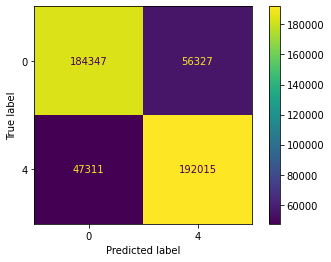

In [ ]:
#Use confusion matrix to determine error between prediction and actual data
cm = confusion_matrix(Y_test, y_predicted, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_1.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn import svm
model_2 = svm.LinearSVC()
model_2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [ ]:
y_predicted_2 = model_2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_2)

0.77658125

In [ ]:
from sklearn.metrics import accuracy_score #gives number of correct predictions
accuracy_score(Y_test, y_predicted_2, normalize = False )

372759

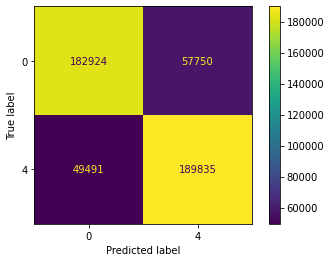

In [ ]:
#Use confusion matrix to determine error between prediction and actual data
cm = confusion_matrix(Y_test, y_predicted_2, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_2.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(max_depth=10, random_state=0)
model_3.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_predicted_3=model_3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_3)

0.7109958333333334

In [ ]:
from sklearn.metrics import accuracy_score #gives number of correct predictions
accuracy_score(Y_test, y_predicted_3, normalize = False )

341278

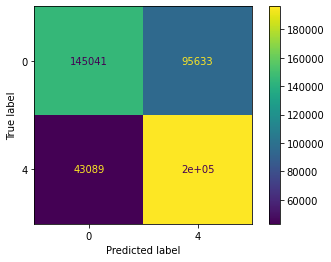

In [ ]:
#Use confusion matrix to determine error between prediction and actual data
cm = confusion_matrix(Y_test, y_predicted_3, labels=model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_3.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_4=MultinomialNB()
model_4.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_predicted_4=model_4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_4)

0.7646875

In [ ]:
from sklearn.metrics import accuracy_score #gives number of correct predictions
accuracy_score(Y_test, y_predicted_4, normalize = False )

367050

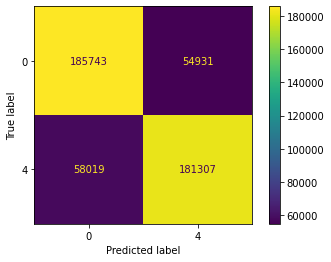

In [ ]:
cm = confusion_matrix(Y_test, y_predicted_4, labels=model_4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_4.classes_)
disp.plot()

plt.show()